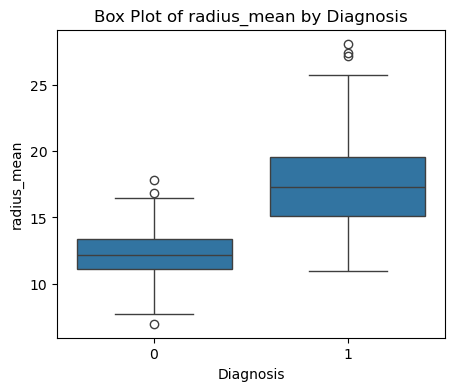

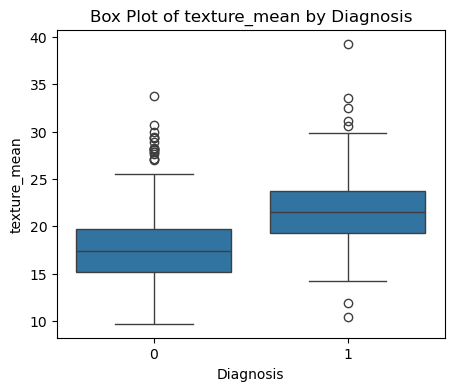

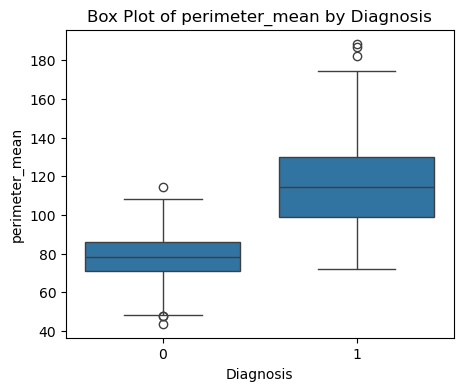

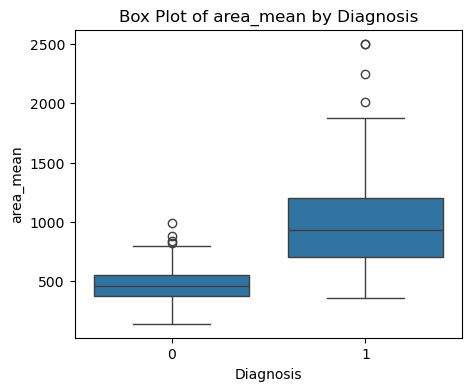

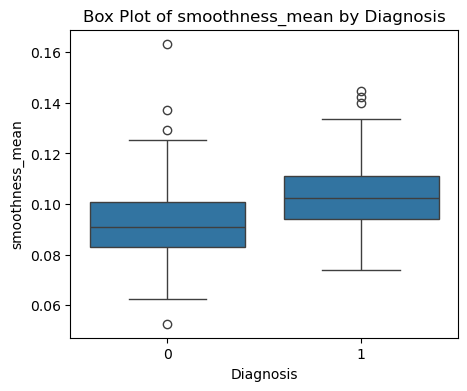

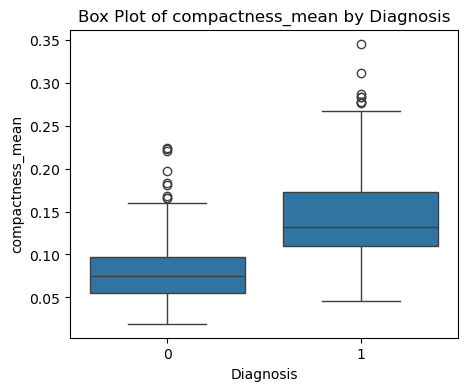

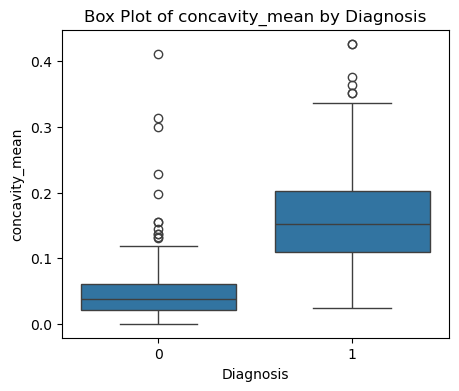

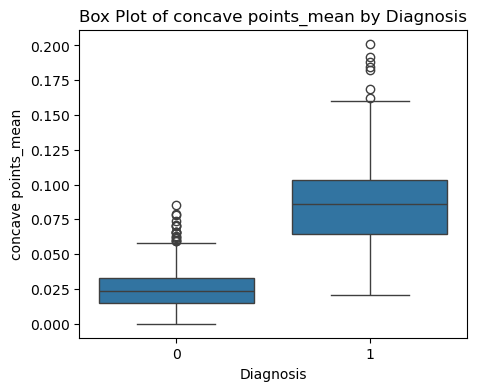

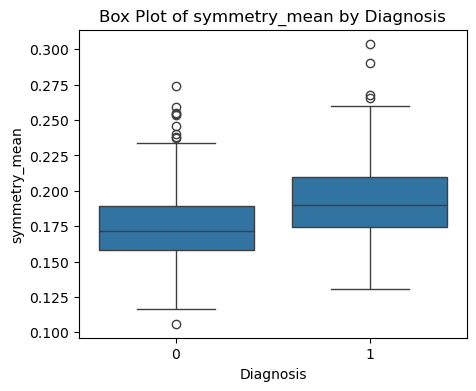

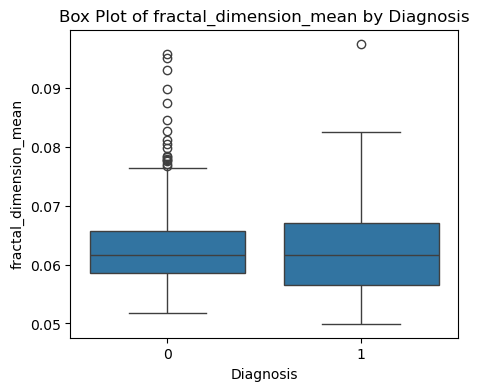

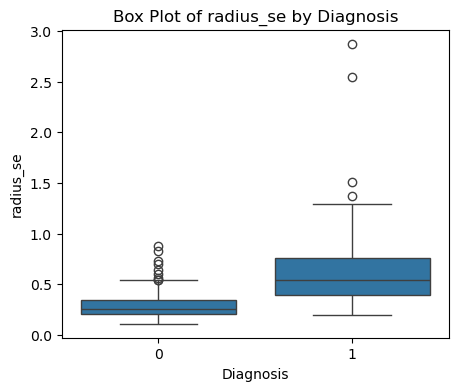

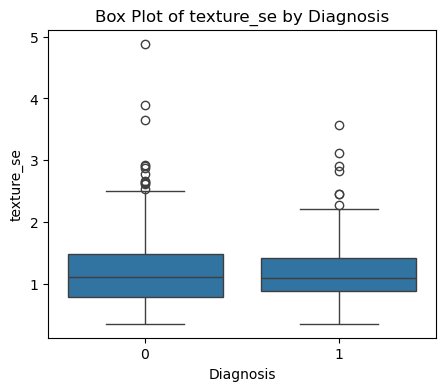

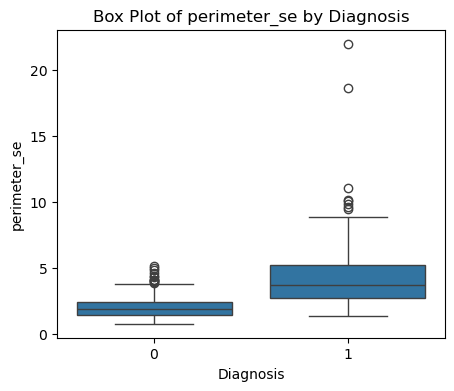

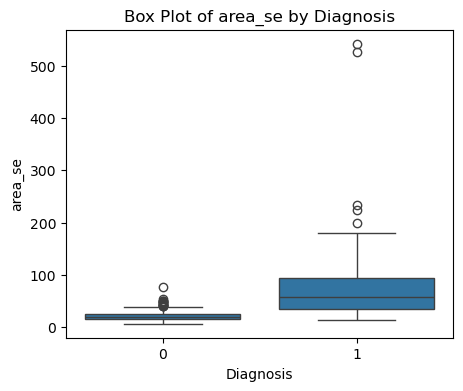

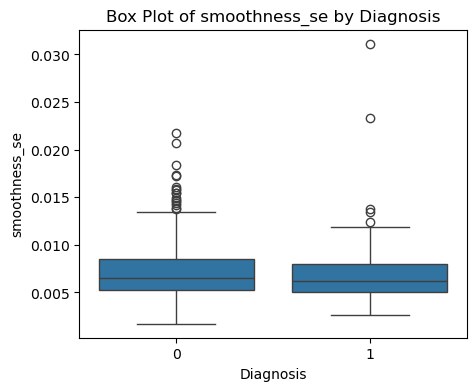

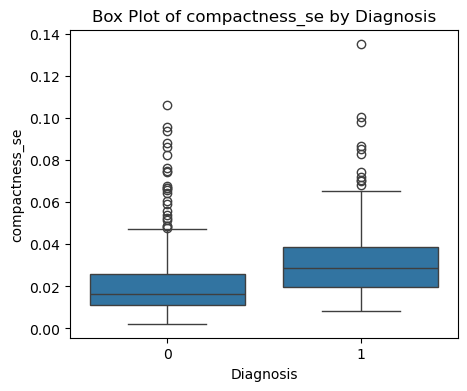

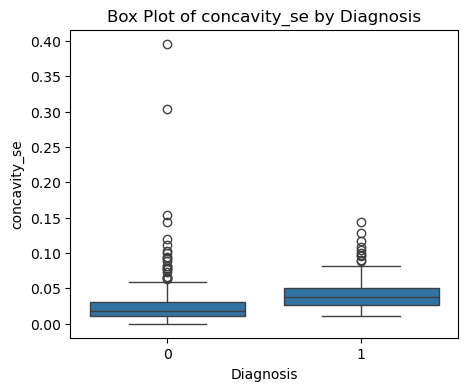

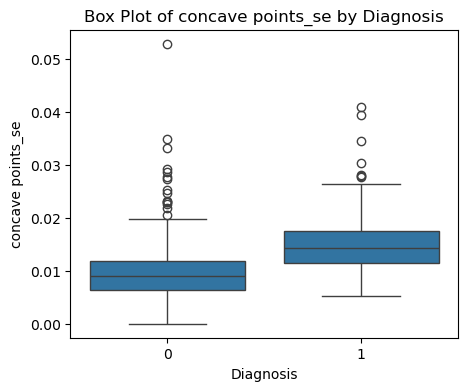

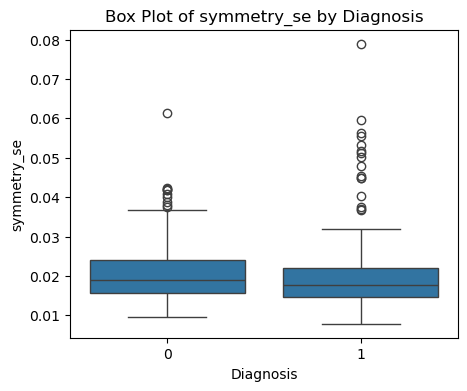

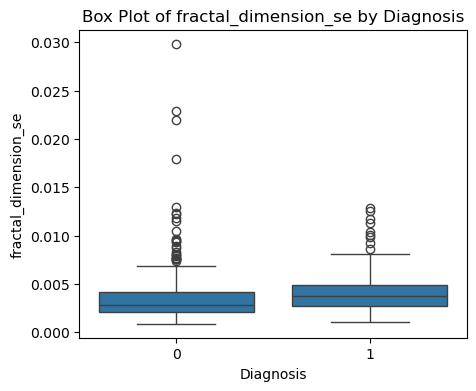

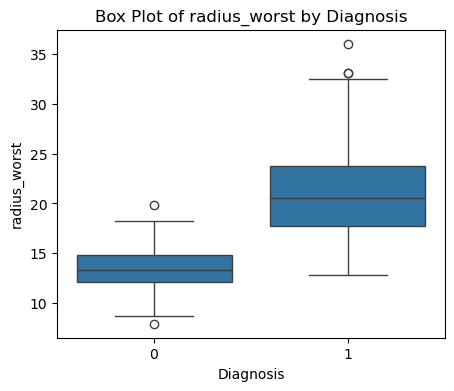

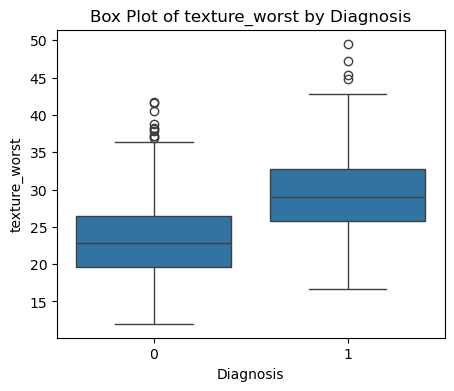

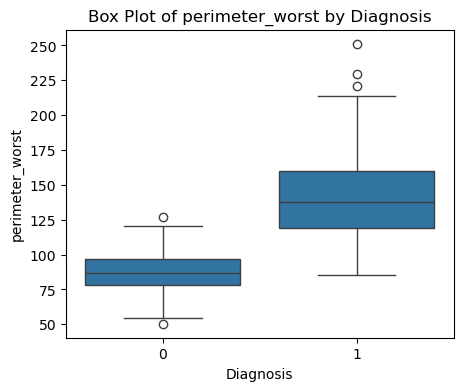

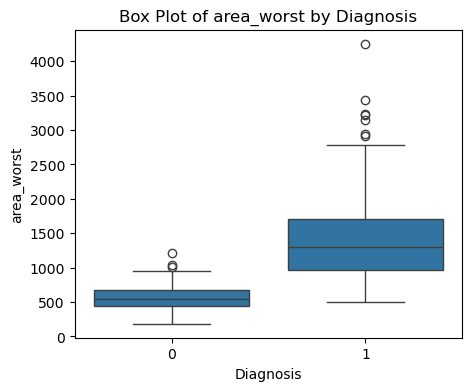

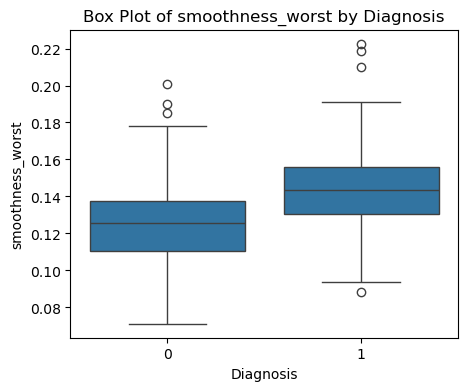

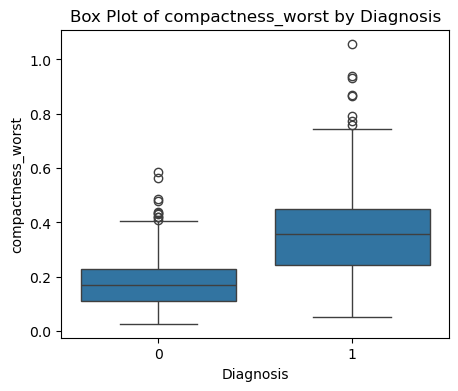

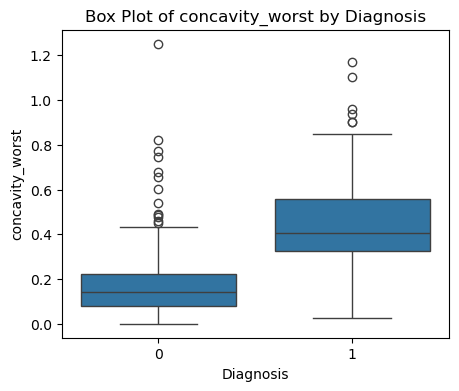

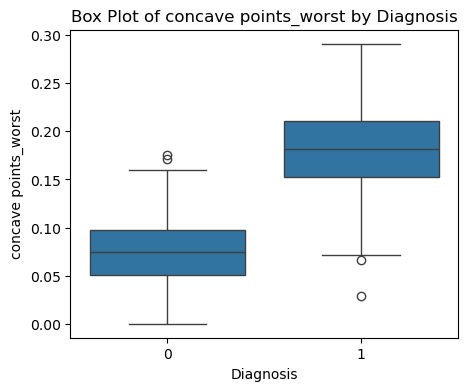

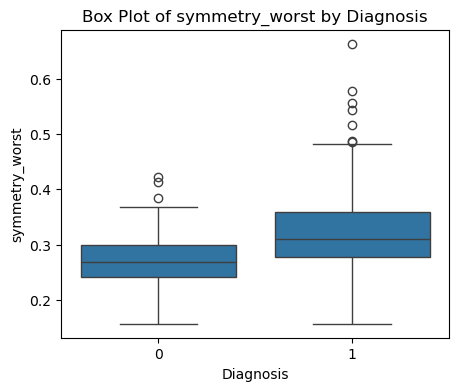

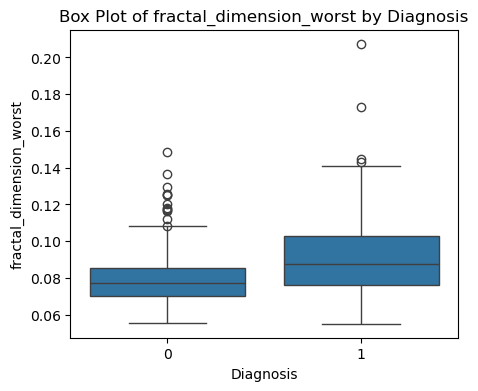

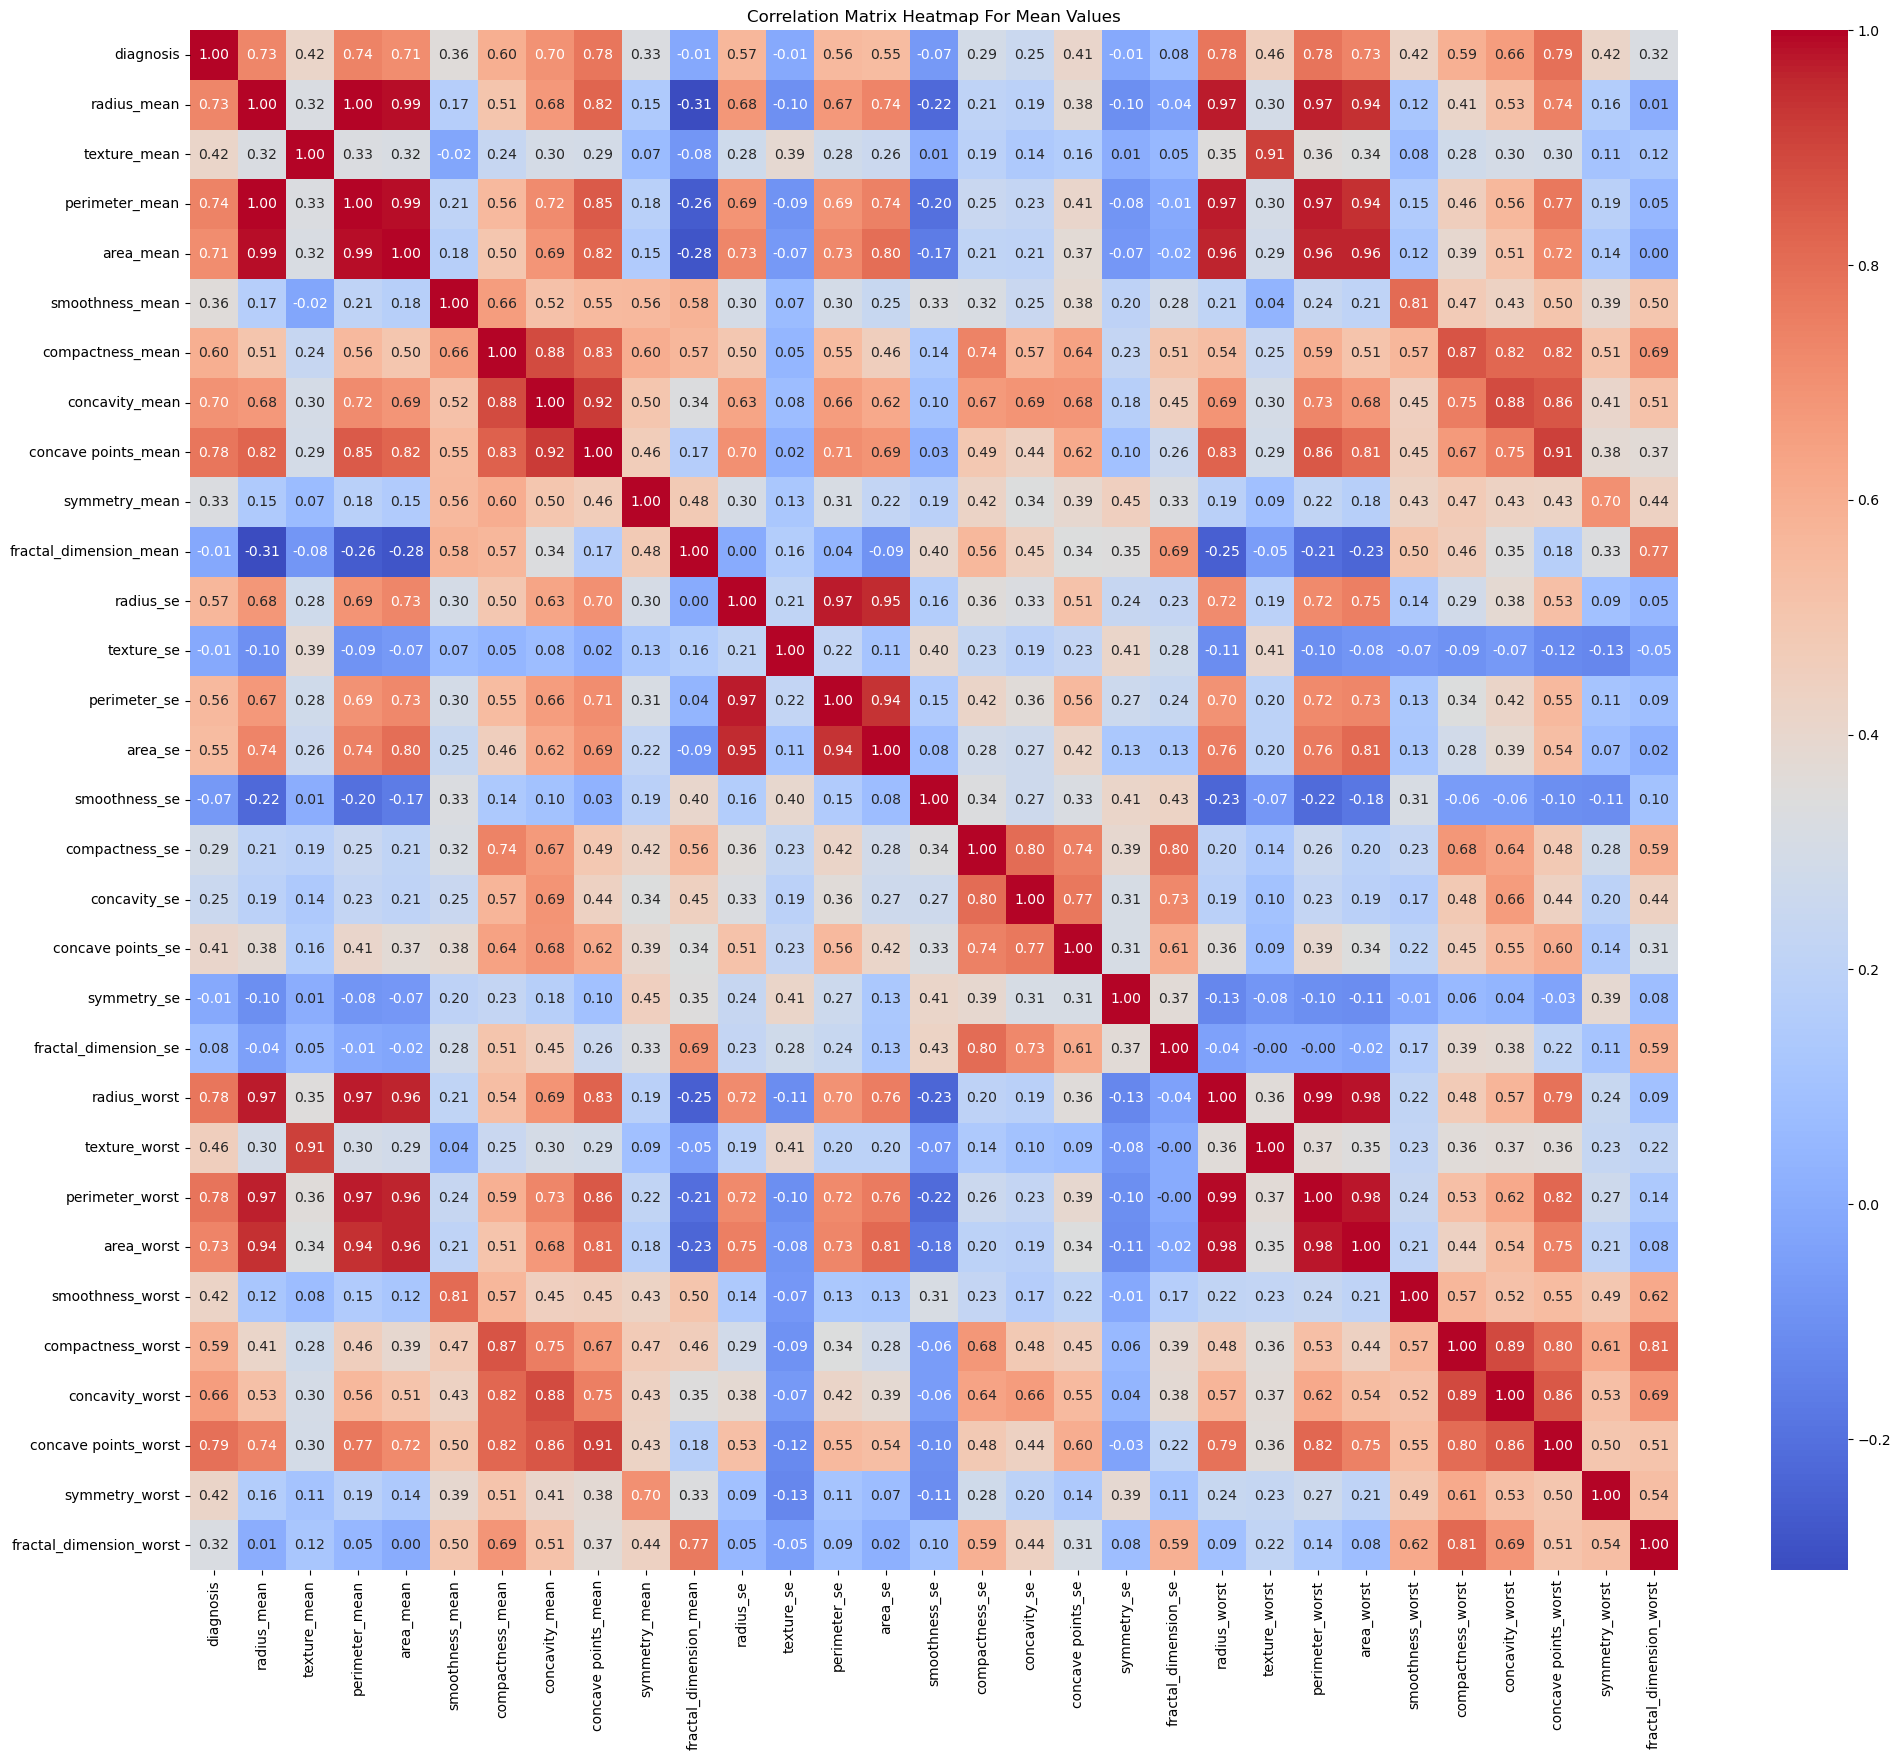

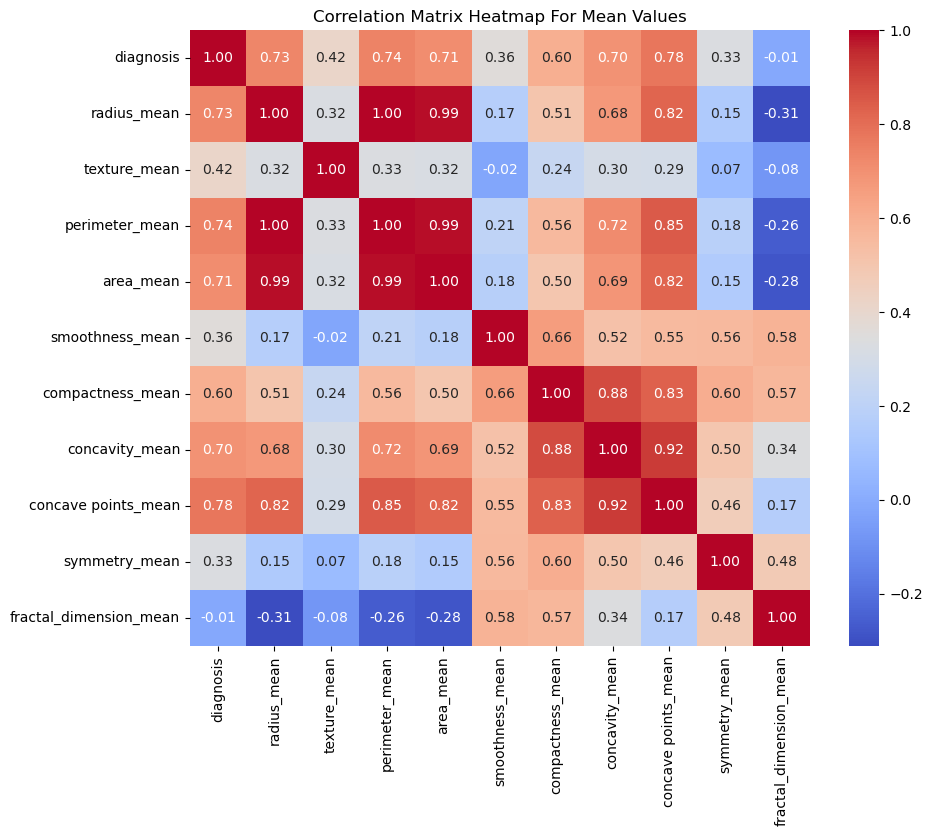

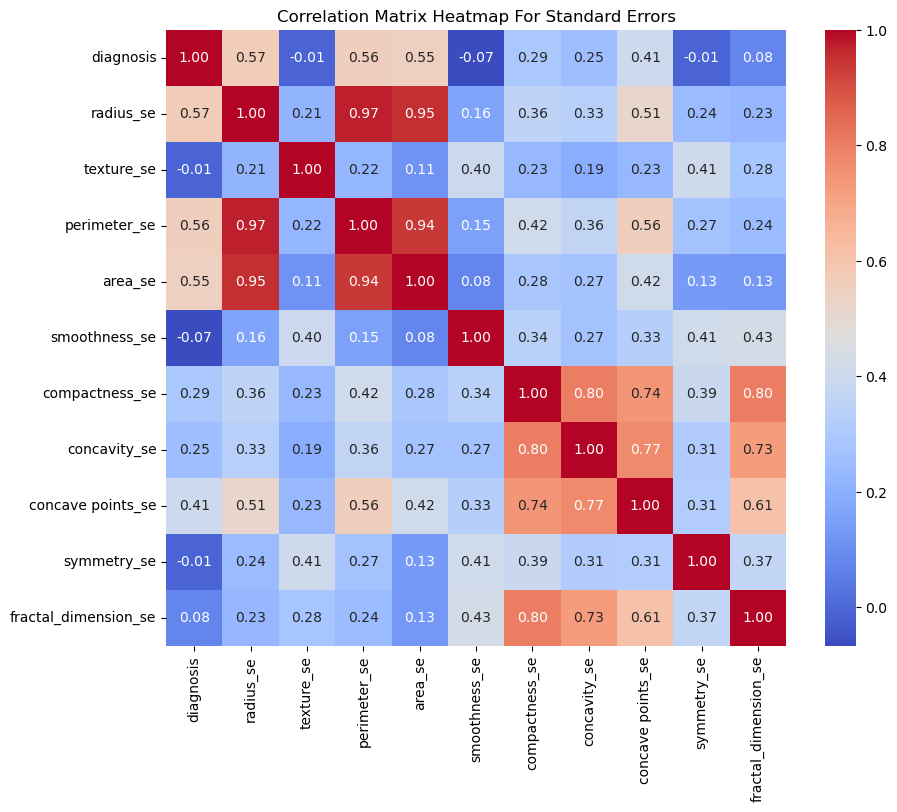

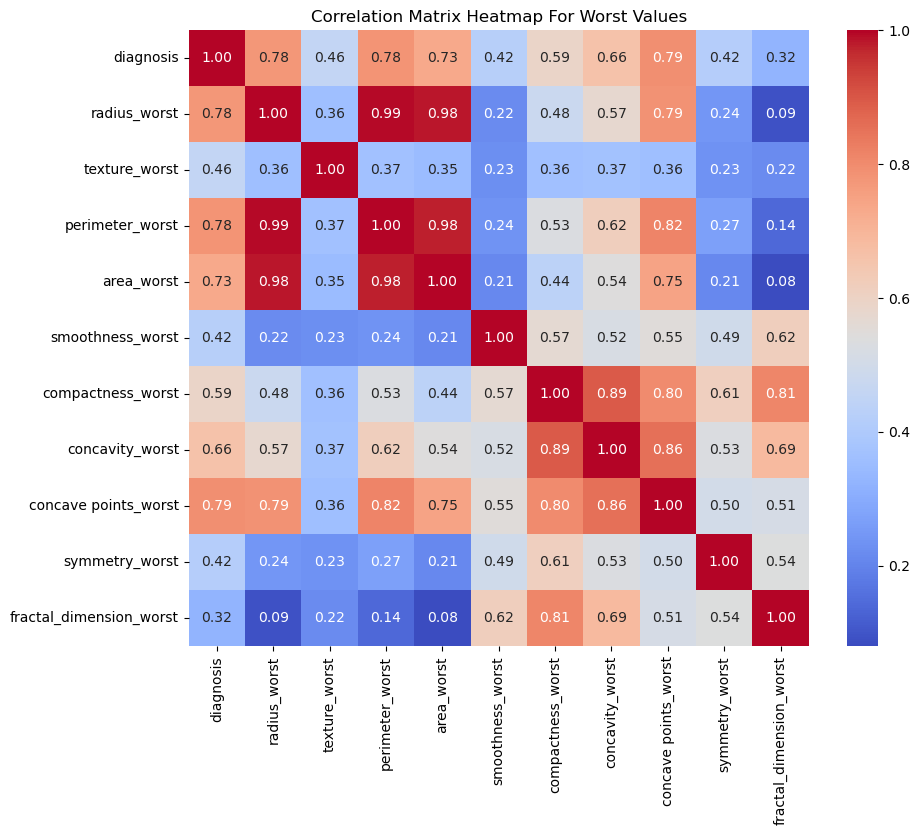

5 highest correlation coefficients for the mean data
[0.7426355297258328, 'perimeter_mean']
[0.730028511375456, 'radius_mean']
[0.7089838365853895, 'area_mean']
[0.6963597071719053, 'concavity_mean']
[0.5965336775082529, 'compactness_mean']


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#load 
data = pd.read_csv("data.csv")
dataMean = pd.read_csv("data.csv")
dataSE = pd.read_csv("data.csv")
dataW = pd.read_csv("data.csv")
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
dataMean['diagnosis'] = dataMean['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
dataSE['diagnosis'] = dataSE['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
dataW['diagnosis'] = dataW['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

#data cleaning
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)
dataMean.drop(['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se',
               'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
dataSE.drop(['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
     'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst',
'symmetry_worst', 'fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
dataW.drop(['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','Unnamed: 32'], axis=1, inplace=True)

#feature engineer the diagnosis

#you could do this if you want to see the trends between every feature
#but considering we only care about diagnosis I don't think this is necessary
'''
plt.figure(figsize=(20, 16))
sns.pairplot(dataMean)
plt.title('Pair Plot of Features')
plt.show()
'''

#boxplots between features and diagnosis to show outliers and skew
for column in data.columns:
    if column == 'diagnosis':
        continue
    cols = ['diagnosis',column]
    diag = data[cols]
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='diagnosis', y=column, data=diag)
    plt.title("Box Plot of "+column+" by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(column)
    plt.show()

#start heatmap section
# Calculate correlation matrix for mean
correlation_matrix = data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap For Mean Values')
plt.show()
# Calculate correlation matrix for mean
correlation_matrix = dataMean.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap For Mean Values')
plt.show()

# Calculate correlation matrix for Standard Error
correlation_matrix = dataSE.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap For Standard Errors')
plt.show()

# Calculate correlation matrix for worst values
correlation_matrix = dataW.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap For Worst Values')
plt.show()
#end heatmap section


#summary
coeffs = []
for column in dataMean.columns:
    if column == 'diagnosis':
        continue
    coeffs.append([np.corrcoef(dataMean[column], dataMean['diagnosis'])[0, 1],column])

coeffs.sort(reverse=True)
print("5 highest correlation coefficients for the mean data")
for i in range(1,6):
    print(coeffs[i])
    
    
